# Embedding Vector Batch Correction 

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from inmoose.pycombat import pycombat_norm

from sklearn.decomposition import PCA

In [2]:
data_dir = "~/siads696/data"

In [3]:
df_embed_vec = pd.read_csv(os.path.join(data_dir, "bbbc021_image_embed_compact.csv"), dtype={"Metadata_SMILES": "str", "Metadata_MoA": "str"})
df_embed_vec.head()

,Metadata_PlateNumber,Metadata_ID,Metadata_TableNumber,Metadata_ImageNumber,Metadata_Replicate,Metadata_Compound,Metadata_Concentration,Metadata_SMILES,Metadata_MoA,Z000_DAPI,...,Z1014_Actin,Z1015_Actin,Z1016_Actin,Z1017_Actin,Z1018_Actin,Z1019_Actin,Z1020_Actin,Z1021_Actin,Z1022_Actin,Z1023_Actin
0,27481,4_233,4,233,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000045,...,0.375635,0.188088,-0.250119,-0.366313,-0.311198,1.381419,-0.321486,1.215452,-0.089709,-0.413298
1,27481,4_234,4,234,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000222,...,0.002416,0.251005,-0.229220,0.139000,0.023661,1.703081,-0.629341,2.002971,0.416103,-0.491764
2,27481,4_235,4,235,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000026,...,0.542001,0.291677,-0.292990,-0.361006,-0.398080,1.291885,-0.288020,0.750829,-0.016331,-0.539989
3,27481,4_236,4,236,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000042,...,0.201174,0.477845,-0.373518,-0.289697,-0.150430,0.875186,-0.315154,1.510594,0.013336,-0.460936
4,27521,4_473,4,473,2,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000176,...,0.185048,0.381037,-0.187140,0.177585,-0.086358,1.435541,-0.425821,0.931412,0.423981,-0.502664


In [4]:
df_embed_vec.shape

(13200, 3081)

In [6]:
data = df_embed_vec.iloc[:,9:]
batches = df_embed_vec.iloc[:,0]

In [7]:
batches

0        27481
1        27481
2        27481
3        27481
4        27521
         ...  
13195    39301
13196    39301
13197    39301
13198    39301
13199    39301
Name: Metadata_PlateNumber, Length: 13200, dtype: int64

In [8]:
data

,Z000_DAPI,Z001_DAPI,Z002_DAPI,Z003_DAPI,Z004_DAPI,Z005_DAPI,Z006_DAPI,Z007_DAPI,Z008_DAPI,Z009_DAPI,...,Z1014_Actin,Z1015_Actin,Z1016_Actin,Z1017_Actin,Z1018_Actin,Z1019_Actin,Z1020_Actin,Z1021_Actin,Z1022_Actin,Z1023_Actin
0,0.000045,-0.000675,0.002460,0.003834,0.054552,-0.072372,0.000054,0.003083,0.224940,0.000090,...,0.375635,0.188088,-0.250119,-0.366313,-0.311198,1.381419,-0.321486,1.215452,-0.089709,-0.413298
1,0.000222,-0.000961,0.002733,0.003763,0.092621,-0.028007,0.000583,0.003478,0.037416,0.000145,...,0.002416,0.251005,-0.229220,0.139000,0.023661,1.703081,-0.629341,2.002971,0.416103,-0.491764
2,0.000026,-0.000803,0.002301,0.003284,0.063191,-0.167158,0.000168,0.002932,0.226368,0.000145,...,0.542001,0.291677,-0.292990,-0.361006,-0.398080,1.291885,-0.288020,0.750829,-0.016331,-0.539989
3,0.000042,-0.001387,0.002038,0.003628,0.067616,-0.089643,0.000405,0.003159,0.152085,0.000095,...,0.201174,0.477845,-0.373518,-0.289697,-0.150430,0.875186,-0.315154,1.510594,0.013336,-0.460936
4,0.000176,-0.001137,0.002780,0.004200,0.067397,0.036090,0.000397,0.003359,0.150965,0.000081,...,0.185048,0.381037,-0.187140,0.177585,-0.086358,1.435541,-0.425821,0.931412,0.423981,-0.502664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0.000406,0.000191,0.003698,0.002779,0.136311,-0.185160,0.001072,0.003071,0.130485,0.000216,...,-0.184067,-0.172528,-0.012892,0.396559,-0.324819,1.984250,-0.749387,2.396563,0.603147,0.377651
13196,0.000210,0.000777,0.002658,0.002515,0.046908,-0.195092,0.000356,0.003052,0.339171,0.000206,...,0.418140,0.198861,-0.125679,-0.230162,-0.354472,1.673839,-0.249621,0.132188,-0.179003,-0.476881
13197,0.000526,0.000997,0.004053,0.002783,0.160792,-0.396577,0.001226,0.004021,0.028947,0.000194,...,-0.484574,-0.413631,0.328697,0.099049,0.069000,2.247335,-0.451511,2.624677,1.282296,-0.214316
13198,-0.000049,0.000368,0.002157,0.002470,0.027923,-0.197229,0.000150,0.002686,0.391852,0.000181,...,0.718566,0.178205,-0.115418,-0.136509,-0.512875,1.485273,-0.206442,-0.031611,-0.164196,-0.431555


In [9]:
data_corrected = pycombat_norm(data.T, batches)

[INFO] Found 55 batches
[INFO] Adjusting for 0 covariate(s) or covariate level(s)
[INFO] Standardizing Data across genes.
[INFO] Fitting L/S model and finding priors.
[INFO] Finding parametric adjustments.
[INFO] Adjusting the Data


In [14]:
data_corrected = data_corrected.round(10)

In [15]:
data_corrected.T

,Z000_DAPI,Z001_DAPI,Z002_DAPI,Z003_DAPI,Z004_DAPI,Z005_DAPI,Z006_DAPI,Z007_DAPI,Z008_DAPI,Z009_DAPI,...,Z1014_Actin,Z1015_Actin,Z1016_Actin,Z1017_Actin,Z1018_Actin,Z1019_Actin,Z1020_Actin,Z1021_Actin,Z1022_Actin,Z1023_Actin
0,0.000048,-0.000065,0.002642,0.003536,0.049259,-0.091354,0.000069,0.003019,0.282907,0.000146,...,0.454990,0.134093,-0.183729,-0.274622,-0.334495,1.243070,-0.255104,0.963327,-0.121460,-0.326638
1,0.000206,-0.000380,0.002976,0.003460,0.090233,-0.035105,0.000581,0.003541,0.116833,0.000208,...,0.092730,0.190641,-0.165633,0.213599,0.029494,1.540971,-0.525035,1.661467,0.396143,-0.416450
2,0.000031,-0.000207,0.002448,0.002949,0.058557,-0.211531,0.000179,0.002821,0.284172,0.000208,...,0.616472,0.227196,-0.220849,-0.269494,-0.428935,1.160149,-0.225761,0.551435,-0.046371,-0.471649
3,0.000046,-0.000850,0.002127,0.003315,0.063320,-0.113251,0.000409,0.003120,0.218386,0.000151,...,0.285652,0.394520,-0.290574,-0.200597,-0.159741,0.774231,-0.249552,1.224972,-0.016013,-0.381165
4,0.000330,-0.000870,0.003134,0.003948,0.088846,0.081647,0.000813,0.003016,0.068839,0.000247,...,-0.020315,0.140883,-0.109927,0.289298,-0.066874,1.750260,-0.640512,1.972492,0.889125,-0.850808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0.000164,-0.000571,0.002913,0.002745,0.076932,-0.151053,0.000526,0.003114,0.243652,0.000076,...,0.284902,0.083639,-0.062280,0.323356,-0.290398,1.324519,-0.416730,1.155651,0.287982,0.005446
13196,-0.000088,0.000157,0.001888,0.002479,-0.014242,-0.157502,-0.000374,0.003088,0.462315,0.000057,...,0.768607,0.413793,-0.152504,-0.169610,-0.312673,0.927012,0.139243,-0.509946,-0.303322,-0.452656
13197,0.000318,0.000431,0.003264,0.002750,0.101898,-0.288315,0.000719,0.004395,0.137260,0.000031,...,0.043528,-0.130695,0.210975,0.089341,0.005445,1.661419,-0.085353,1.323445,0.801419,-0.311899
13198,-0.000422,-0.000351,0.001393,0.002434,-0.033604,-0.158889,-0.000634,0.002595,0.517514,0.000004,...,1.009915,0.395431,-0.144296,-0.095945,-0.431668,0.685540,0.187278,-0.630430,-0.292129,-0.428357


In [16]:
df_embed_vec_corr = pd.concat([df_embed_vec.iloc[:,:9], data_corrected.T], axis=1)
df_embed_vec_corr.head()

,Metadata_PlateNumber,Metadata_ID,Metadata_TableNumber,Metadata_ImageNumber,Metadata_Replicate,Metadata_Compound,Metadata_Concentration,Metadata_SMILES,Metadata_MoA,Z000_DAPI,...,Z1014_Actin,Z1015_Actin,Z1016_Actin,Z1017_Actin,Z1018_Actin,Z1019_Actin,Z1020_Actin,Z1021_Actin,Z1022_Actin,Z1023_Actin
0,27481,4_233,4,233,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000048,...,0.454990,0.134093,-0.183729,-0.274622,-0.334495,1.243070,-0.255104,0.963327,-0.121460,-0.326638
1,27481,4_234,4,234,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000206,...,0.092730,0.190641,-0.165633,0.213599,0.029494,1.540971,-0.525035,1.661467,0.396143,-0.416450
2,27481,4_235,4,235,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000031,...,0.616472,0.227196,-0.220849,-0.269494,-0.428935,1.160149,-0.225761,0.551435,-0.046371,-0.471649
3,27481,4_236,4,236,1,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000046,...,0.285652,0.394520,-0.290574,-0.200597,-0.159741,0.774231,-0.249552,1.224972,-0.016013,-0.381165
4,27521,4_473,4,473,2,5-fluorouracil,0.003,FC1=CNC(=O)NC1=O,NaN,0.000330,...,-0.020315,0.140883,-0.109927,0.289298,-0.066874,1.750260,-0.640512,1.972492,0.889125,-0.850808


In [17]:
df_embed_vec_corr.shape

(13200, 3081)

In [18]:
df_embed_vec_corr.to_csv(os.path.join(data_dir, "bbbc021_image_embed_compact_batchcorr.csv"), index=False)

---

In [9]:
pca_orig = PCA()
pca_orig.fit(data)
orig_components = pca_orig.transform(data)

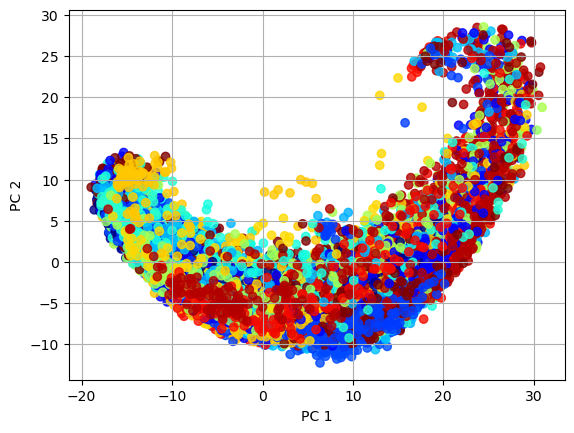

In [13]:
fig, ax = plt.subplots()
ax.scatter(orig_components[:,0], orig_components[:,1], alpha=0.8, c=list(batches), cmap="jet")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
plt.grid(True)
plt.show()

In [14]:
pca_corr = PCA()
pca_corr.fit(data_corrected.T)
corr_components = pca_corr.transform(data_corrected.T)

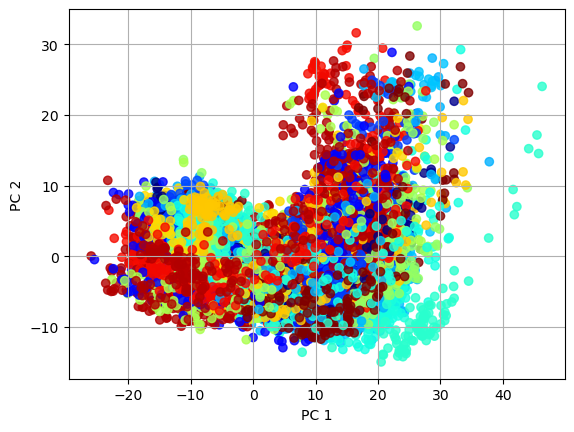

In [15]:
fig, ax = plt.subplots()
ax.scatter(corr_components[:,0], corr_components[:,1], alpha=0.8, c=list(batches), cmap="jet")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
plt.grid(True)
plt.show()